<span style="color:green">**Поздравляю, твой проект принят!**</span>

Владимир, отличная работа, получился качественный аналитический отчет. Поставленные задачи были успешно выполнены! Недочёты исправлены! Надеюсь, ревью было полезным:) Желаю успехов в учебе и следующих проектах!

Актуальные комментарии имеют метку `v2`.

<span style="color:purple">**Привет, Владимир!**</span>

Меня зовут **Василий** и я – ревьювер, буду проверять твой проект. Ты проделал большую работу над проектом, но давай сделаем его еще лучше.

Спасибо, что прислал проект. В тетради ты сможешь найти мои комментарии. Пострайся учесть эти комментарии в ходе выполнения дальнейших проектов.

Обрати внимание, я буду выделять свои комментарии цветом, в зависимости от того, какие действия, важность и особенности тебя ждут в процессе проверки.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Такими комментариями я буду помечать хорошо проделаную работу, а так же хорошо проделаную работу над ошибками.
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
После таких комментариев ничего исправлять не нужно, но я дам рекомендации на будущее и подскажу, что можно улучшить.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Если ты видишь такой комментарий, значит я указываю тебе на недочёт, его нужно исправить. Без такого исправления я не приму твою работу:)
</div>

**Пожалуста, не удаляй мои комментарии. При повторной проверке, я буду ориентироваться на них.**

<span style="color:blue"> Можешь под моими комментариями оставлять свои, в которых опиши свои исправления. Это облегчит процесс проверки и мне, и тебе:) Например, вот так:</span>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА: </b>
</div>

# Аналитика гипотез крупного интернет-магазина для увеличения выручки. 

### Описание проекта. Вместе с отделом маркетинга был подготовилен список гипотез для увеличения выручки.

### Цель. Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 
### Описание данных.
Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
### План.
1. Предобраотка 
2. Приоритизация гипотез
3. Анализ A/B-теста
4. Выводы

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Хорошее введение. Выделена цель исследования. Понятно чему посвящена твоя работа и какие этапы она содержит.
</div>

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np  
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objs as go
import datetime as dt
import scipy.stats as stats

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Правильно, что импортируешь необходимые библиотеки в первой ячейке. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет настроить свое окружение при необходимости.
</div>

In [2]:
# прочитали csv-файл
hypothesis = pd.read_csv('/datasets/hypothesis.csv')  # гипотизы
hypothesis.name = 'hypothesis'
orders = pd.read_csv('/datasets/orders.csv')  # заказы
orders.name = 'orders'
visitors = pd.read_csv('/datasets/visitors.csv')  # посетители
visitors.name = 'visitors'

In [3]:
# Изучите данные и выполните предобработку
def all_data_view(dataset):
    print('Информация о таблице', dataset.name)
    print()
    dataset.columns = dataset.columns.str.lower() # в названии колонок строчные буквы
    dataset.columns = dataset.columns.str.replace(" ", "_", regex=True) # вместо пробела '_'
    display(dataset.head(3)) # 3 первых записи
    print()
    dataset.info() # общая информация
    print()
    dataset.isnull().sum() # информация о пропущенных значениях 
    print()
    print('Количество дубликатов:', dataset.duplicated().sum())  # информация о дубликатах
    print()
    print('*'*100)
all_data_view(hypothesis)
all_data_view(orders)
all_data_view(visitors)

Информация о таблице hypothesis



,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Количество дубликатов: 0

****************************************************************************************************
Информация о таблице orders



,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Количество дубликатов: 0

****************************************************************************************************
Информация о таблице visitors



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Количество дубликатов: 0

****************************************************************************************************


In [4]:
# изменим тип данных
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

#all_data_view(orders)
#all_data_view(visitors)

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Даты приведены к соответствующему типу👍
</div>

Вывод.
1. Получена информация о таблицах
2. Имена столбцов приведены к нижнему регистру, пробелы заменены '_'
3. Пропуски, дубликаты отсутсвуют 
4. Даты приведены к соответствующему формату
5. Данные готовы к дальнейшей обработке.

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Проверь, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах. Дело в том, что при АВ тестировании могут быть ошибки при логировании и распределении пользователей по группам.
</div>

In [5]:
# Проверим пользоватеей, оказавшиеся одновременно в двух группах.
users_a = orders[orders['group'] == 'A']['visitorid']
users_b = orders[orders['group'] == 'B']['visitorid']
orders_ab = orders.query('visitorid in @users_a and visitorid in @users_b')
display(orders_ab['visitorid'].unique())
print('Количество пользователей в двух группах:', orders_ab['visitorid'].nunique())
print('Всего пользователей в тесте:', orders['visitorid'].nunique())

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество пользователей в двух группах: 58
Всего пользователей в тесте: 1031


<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Допустимое решение удалить таких пользователей, однако они остались в таблице `visitors`, которую сложно предобработать от таких ошибок. 
    
Важно отметить в выводе, что такие пользователи были обнаружены и что анализ был выполнен с учетом таких пользователей. Это нужно для будущих тестов, так как позволит коллегам выявить и устранить проблемы с логированием данных.
</div>

In [6]:
# 58 пользователей который одновременно присутствуют в двух группах. Удалим их.
orders = orders.query('visitorid not in @orders_ab["visitorid"]')
print('Всего пользователей в тесте:', orders['visitorid'].nunique())

Всего пользователей в тесте: 973


In [7]:
# 1. Приоритизация гипотез 
# Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
pd.options.display.max_colwidth = 1
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts'] 
hypothesis['ICE'] = hypothesis['ICE'].round(3)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
1) Можно увеличить ширину столбцов, если полностью не помещается информация, для этого можно написать следующий код: 
    
    pd.options.display.max_colwidth = 1

2) Рекомендую производить округление до 3 знаков после запятой.
</div>

In [8]:
# Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод:
Фреймворк RICE состоит из четырёх компонент:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
Efforts — сколько стоит протестировать эту гипотезу. 
Соответвенно, чем болеше пользователей затрагивает гипотиза, тем выше она получет приоритет. Так как цель магазина увеличение выручки, будем анализировакть гипотизу, затаргивающую наибольшее количество клиентов. К тому же фреймворк ICE ставит данную гиплотизу на 3 место. 

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Все верно, охват меняет приоритезацию. Отличие фреймворков определено.
</div>

In [9]:
#Анализ A/B-теста
# 1. Построим график кумулятивной выручки по группам. Сделайте выводы и предположения.
# 1.1 Создайте датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders.
# Избавьтесь от дубликатов методом drop_duplicates().
datesGroups = orders[['date','group']].drop_duplicates()

1.2 Объявим переменную ordersAggregated, содержащую:
дату;
группу A/B-теста;
число уникальных заказов в группе теста по указанную дату включительно;
число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
суммарную выручку заказов в группе теста по указанную дату включительно.

In [10]:
# 1.2
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

1.3
Объявим переменную visitorsAggregated, содержащую:
дату;
группу A/B-теста;
количество уникальных посетителей в группе теста по указанную дату включительно.
1.4
ordersAggregated и visitorsAggregated отсортируем по столбцам 'date', 'group' в указанном порядке.

In [11]:
# 1.3, 1.4
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

1.5
Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

In [12]:
#5
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

1.6
Присвоем столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [13]:
#1.6
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Кумулятивные данные собраны👍
</div>

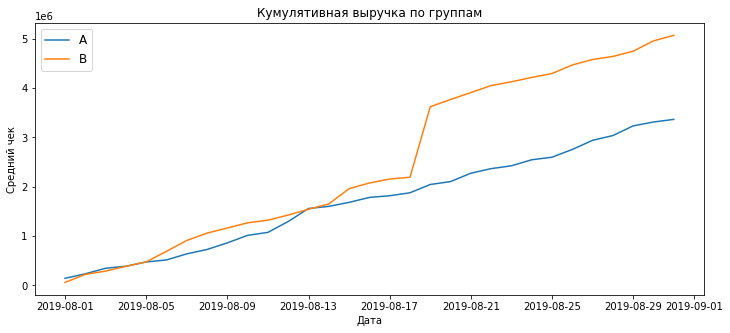

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(fontsize=12)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивная выручка по группам')
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Стоит заняться оформлением всех графиков в отчете. Нужно добавить подписи осей и названия для всех графиков.

Рекомендую также изучить новые библиотеки визуализации и новые методы в уже изученных.  Прикрепляю несколько интересных ссылок по визуализации:


https://coderlessons.com/tutorials/python-technologies/izuchai-siborna/siborn-kratkoe-rukovodstvo

https://tproger.ru/translations/python-data-vizualization/
    

</div>

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Графики готовы👍
</div>

Вывод:
В середине теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Резкий рост обнаружен👍
</div>

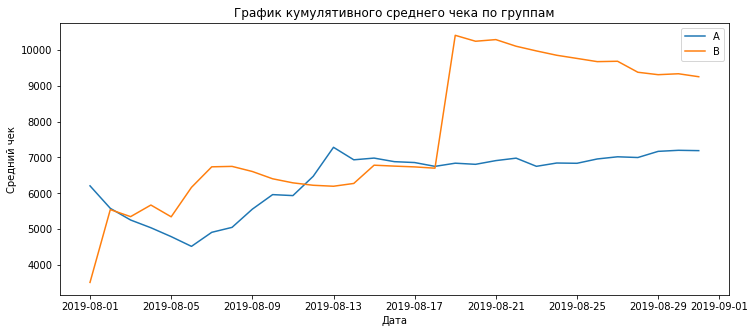

In [15]:
# Построим график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.show()

Вывод:
Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.
Резкий скачок в районе 19-го августа, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Может ли выброс в этом графике объяснить выброс 19 августа на предыдущем?
</div>

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. Сохраним в переменной mergedCumulativeRevenue. 
Построим график относительно различия кумулятивного среднего чека группы B к группе A. 
Добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

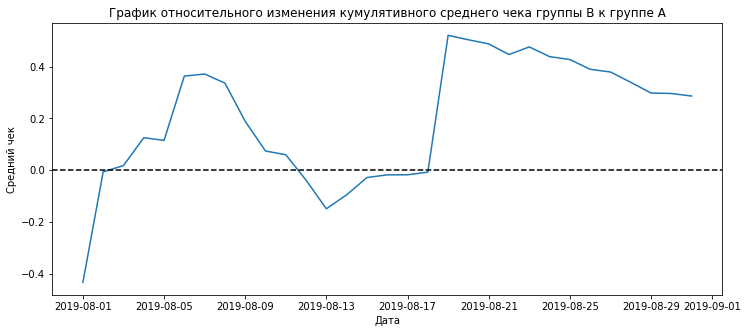

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Вывод:
Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.
Пик 6го августа может объяснятся проведением какой-либо акции или распродажи. 

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Второй пик 19 августа можно объяснить ранее обнаруженными аномалиями. Но чем можно объяснить первый пик с учётом того, что в эти даты аномалий по среднему чеку и по выручке не было?
</div>

5. Построим график кумулятивного среднего количества заказов на посетителя по группам.
Добавьте в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
Объявите переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно.

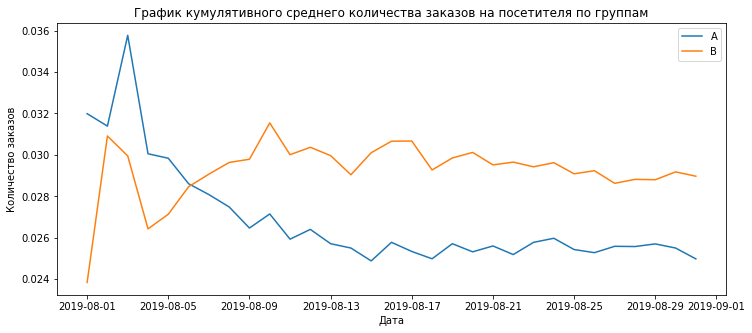

In [17]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.show()
# задаем масштаб осей
#plt.axis([dt.datetime(2019, 8, 9), dt.datetime(2019, 9, 1), 0, 0.05])

Вывод:
В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен, к середине теста графики стабилизировались около определенных значений.
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
По заданию нужно также построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и прокомментировать его.
</div>

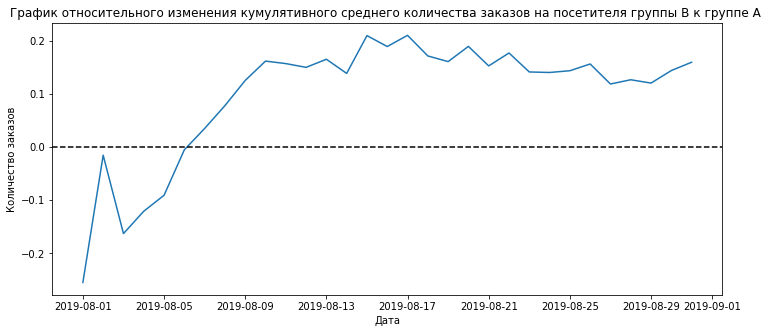

In [18]:
# Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A 
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['conversionB'])/(mergedCumulativeData['conversionA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A ')
plt.show()

Вывод:
В начале теста группа В проигрывала группе А, но затем вырвалась вперед и сохранила лидерство до окончания тестирования.

<div class="alert alert-block alert-success">

**Комментарий ревьювера v2 (все отлично)**
    
Принято👍
</div>

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


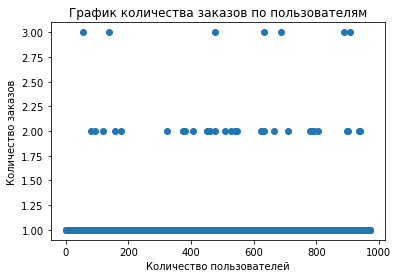

In [19]:
# 6. Построим точечный график количества заказов по пользователям.
# Найдем число заказов по пользователям — создайте датафрейм c двумя столбцами: 'userId' и 'orders'. 
# Назовем его ordersByUsers. Отсортируйте по убыванию количества заказов пользователей и выведите на экран

ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head()) 

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям')
plt.show()

Вывод:
Много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

In [20]:
# 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 
# Выберем границу для определения аномальных пользователей.

display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([1., 2.])

Вывод:
Не более 5% пользователей оформляли больше чем 2 заказа.
Разумно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
     
Отлично, перцентили количества заказов на пользователя рассчитаны верно.
</div>

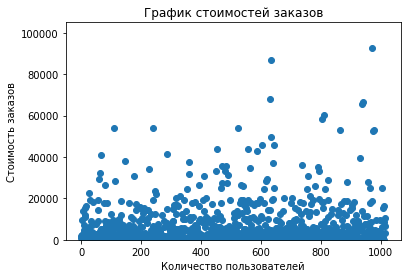

In [21]:
# 8. Построем точечный график стоимостей заказов.
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов')
plt.ylim([0, 105000])
plt.show()

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
    
Можно увеличить масштаб графика, не учитывая аномально большие значения при помощи:
    
    plt.ylim([0, 150000])
</div>


Вывод:
Есть 2 выброса, один на 1.3млн! Второй меньше, на 20тр. Основнаяя масса стоимостей заказов находится в районе до 10тр.

In [22]:
# 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
display(np.percentile(orders['revenue'], [95, 99])) 

array([26785., 53904.])

Вывод:
Определяем границу по величине 99% перцентиля (58233)

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
     
Отлично, перцентили величины заказов рассчитаны верно. 
</div>

10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
Создадим переменные 
ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 
Посчитаем статистическую значимость различия среднего количества заказов по результатам теста. Примените тест Манна-Уитни. 
Выведите p-value для сравнения среднего между группами. Округлим p-value до 5 знаков после запятой. 
Вычислим и выведем относительное различие в среднем между группами. Округлим до 3 знаков после запятой.
Сформулируем гипотезы. 
Нулевая: различий в среднем количестве заказов между группами нет. 
Альтернативная: различия в среднем между группами есть.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
     
Гипотезы верно сформулированы👍
</div>

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
    
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  23              142779           17               
1 2019-08-02  19              91602            23               
2 2019-08-03  24              112473           14               
3 2019-08-04  11              41176            14               
4 2019-08-05  22              86383            21               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  59758            23                  142779                
1  162043           42                  234381                
2  67049            66                  346854                
3  96890            77                  388030                
4  89908            99                  474413                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  17                  59758                719                
1  40                  221801               619                
2  54                  288850         

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print()
print('P-value: ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост: ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value:  0.011
Относительный прирост:  0.160


<div class="alert alert-block alert-danger">
    
**Комментарий ревьювера (недочет, который нужно доработать)**
    
Ячейку нужно разбить на несколько по смыслу выполняемых задач. Сбор данных и проверка гипотез отдельные действия.

</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера v2 (что можно улучшить)**
    
Не нужно снова собирать кумулятивные даннык. Перед анализом графиков ты уже собрал их в cumulativeData.

</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Рекомендую обозначать, что именно рассчитано – где p-value, а где относительный прирост.
</div>

Вывод:
P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен. Группа B лучше по результатам.
</div>

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Нулевая гипотеза: различий в среднем чеке между группами нет. 
Альтернативная гипотеза: различия в среднем чеке между группами есть. 
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [25]:
print('P-value: ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост: ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value:  0.829
Относительный прирост:  0.287


Вывод:
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Не смотря на это средний чек группы B значительно выше среднего чека группы A (на 25.9%).

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Ты верно сделал вывод, что статистически значимых различий в среднем чеке нет.
</div>

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Приступаем к подготовке очищенных от аномалий данных.
95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям.
95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. 
Примите за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.
Удалять нужно именно пользователей — сначала определить аномальные заказы. Затем пользователей, совершивших их, и добавить их в список аномальных. 
Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию. 
Выведем первые 5 строк переменной abnormalUsers.

In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']  
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
dtype: int64


42

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Здорово, что посчитал аномальных пользователей. Это важно для оценки и контроля данных после фильтрации.
    
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Стоит исключить ручной ввод данных, такой код неустойчив к изменениям исходных данных. Вместо этого лучше использовать перцентили:
    
    int(np.percentile(orders['revenue'], [95])) 
</div>

In [27]:
# извини, я не понял к чему это... объясни, пожалуйста.
int(np.percentile(orders['revenue'], [95]))

26785

Теперь у вас есть множество (42) аномальных пользователей. После их удаления будет пора считать статистическую значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.

Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. 
Выведем p-value для сравнения среднего между очищенными группами. Округлии p-value до трёх знаков после запятой. 
Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value: ', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value:  0.013
Относительный прирост:  0.161


Вывод:
Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B лучше сегмента A.

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Всё верно, значимые различия по-прежнему есть.
    
</div>

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
Выведем p-value для сравнения средних чеков между очищенными группами. 
Округлим p-value до трёх знаков после запятой. 
Выведем относительный прирост среднего чека очищенной группы B, округлив до трёх знаков после запятой.

In [29]:
print('P-value: ', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост: ', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value:  0.842
Относительный прирост:  -0.031


Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными.
По разнице средних чеков групп различий практически нет.

Примимаем решение:
Остановить тест, зафиксировать победу группы В.


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен с выводом. После очистки значимых отличий по среднему чеку не появилось.
</div>

Вывод:
1. Предобраотка данных:
  - Получена информация о таблицах
  - Имена столбцов приведены к нижнему регистру, пробелы заменены '_'
  - Пропуски, дубликаты отсутсвуют
  - Даты приведены к соответствующему формату
  - Данные готовы к дальнейшей обработке.

2. Приоритизация гипотез. Применили 2 подхода: 
 - фреймворк ICE 
 - фреймворк RICE
Приняли решение проанализировать гипотезу №7 "Добавить форму подписки на все основные страницы"

3. Анализ A/B-теста
  - Построили график кумулятивной выручки по группам.
  В середине теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результаты
  - Построили график кумулятивного среднего чека по группам
  Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.
  - Построили график относительного изменения кумулятивного среднего чека группы B к группе A
  Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.
  - Построили график кумулятивного среднего количества заказов на посетителя по группам
  В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.
  - Построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
  В начале теста группа В проигрывала группе А, но затем вырвалась вперед и сохранила лидерство до окончания тестирования.
  - Построили точечный график количества заказов по пользователям. 
  Много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
  - Посчитали 95-й и 99-й перцентили количества заказов на пользователя.
  Не более 5% пользователей оформляли больше чем 2 заказа. Разумно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.
  - Построили точечный график стоимостей заказов. 
  Есть 2 выброса, один на 1.3млн! Второй меньше, на 20тр. Основнаяя масса стоимостей заказов находится в районе до 10тр.
  - Посчитали 95-й и 99-й перцентили стоимости заказов.
  Определили границу по величине 99% перцентиля (58233).
  - Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
  Сформулировали гипотезы: 
Нулевая: различий в среднем количестве заказов между группами нет. 
Альтернативная: различия в среднем между группами есть.
  Сделали вывод: P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.
  - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
  Сформулировали гипотезы:
Нулевая гипотеза: различий в среднем чеке между группами нет. 
Альтернативная гипотеза: различия в среднем чеке между группами есть.
  Сделали вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Не смотря на это средний чек группы B значительно выше среднего чека группы A (на 25.9%).
  - Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
  Сформулировали гипотезы:
Нулевая гипотеза: различий в среднем чеке между группами нет. 
Альтернативная гипотеза: различия в среднем чеке между группами есть.
  Сделали вывод: Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B лучше сегмента A.
  - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
  Сформулировали гипотезы:
Нулевая гипотеза: различий в среднем чеке между группами нет. 
Альтернативная гипотеза: различия в среднем чеке между группами есть.
  Сделали вывод: Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными. По разнице средних чеков групп различий практически нет.
  ВЫВОД:
  Примимаем решение:
  Остановить тест, зафиксировать победу группы В. Так как группа В демонстрирует прирост как с "сырими" данными, так и с "очищенными".

<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Согласен с решением. Тест прошел успешно! Среднее количество заказов увеличилось при отсутствии значимых изменений по среднему чеку -> выручка увеличилась, так как стали покупать чаще.
</div>

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (общий вывод)**
    
Владимир, мне понравилась твоя работа! Выводы хорошо структурированы и достаточно содержательны, умеешь считать перцентили, собирать и визуализировать данные, качественно проводишь проверку гипотез. Спасибо за четкие комментарии по результатам исследования, аккуратный код и качественное оформление отчета! Это упростило проверку. Для принятия твоей работы нужно исправить критические недочёты:
    

* проверить пересечение групп;
* оформить графики;
* построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
* оптимизировать код, где требуется.
    
В дополнении прикрепляю полезный материал по теме A/B-тестирования: 

* https://your-scorpion.ru/ab-tests-check-mathematics/
    
Жду твою работу!
  
</div>